<center>
    <font size="6"><b>Introduction to Time Series Clustering</b></font>
    <br>
    <font size="3">(draft version)</font>
</center>

<br>

<center>
    <font size="3"><b>Piotr Lipiński</b></font>
    <br>
    Computational Intelligence Research Group, Institute of Computer Science, University of Wroclaw, Poland
    <br>
    lipinski@cs.uni.wroc.pl
</center>

### Abstract:

This notebook presents a few examples of clustering time series with the regular k-means as well as with the time series k-means (DTW Barycenter Averaging k-means, DBA-k-means).

**REMARK:** start with Dataset 1 and see that k-means works (it should not - the time series are the same, but shifted only), then move to the Dataset 4

In [1]:
# !conda install -c conda-forge tslearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import gzip
import pickle
import time

%matplotlib inline

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans

# A

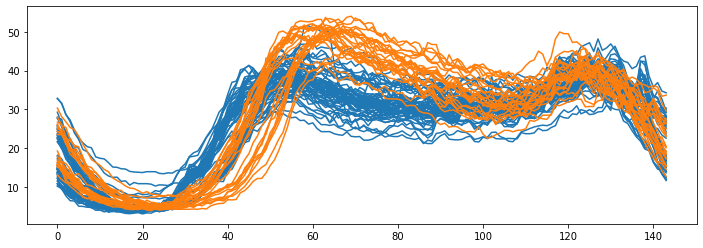

In [10]:
# Dataset 0
df = pd.read_csv('Dane/water_consumption_profiles.csv')
df['date'] = df['date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
df = df.set_index('date')
df_ = df.groupby([df.index.month, df.index.weekday]).mean()
X = df_.values
y = df_.reset_index([1])['date'].map(lambda x: 0 if x < 5 else 1).values
N = len(y)

plt.figure(figsize=(12, 4))
plt.plot(X[y == 0, :].T, '#1F77B4')
plt.plot(X[y == 1, :].T, '#FF7F0E')
plt.show()

In [11]:
shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65*N):].copy()
train_indices = shuffled_indices_[:int(0.65*N)].copy()

X_train, y_train = X[train_indices, :], y[train_indices]
X_test, y_test = X[test_indices, :], y[test_indices]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54, 144) (54,)
(30, 144) (30,)


### Kmeans

In [35]:
t = time.time()

kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

print(time.time() - t)

0.03618264198303223


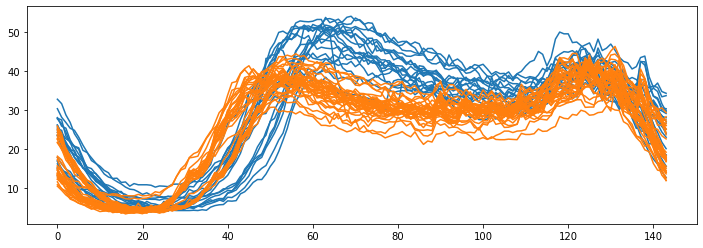

In [36]:
labels = kmeans.predict(X_train)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_train[labels == 0, :].T, '#1F77B4')
plt.plot(X_train[labels == 1, :].T, '#FF7F0E')
plt.show()

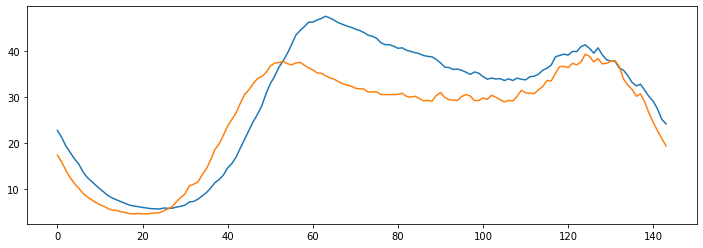

In [37]:
plt.figure(figsize=(12, 4))
plt.plot(kmeans.cluster_centers_[0, :].T, '#1F77B4')
plt.plot(kmeans.cluster_centers_[1, :].T, '#FF7F0E')
plt.show()

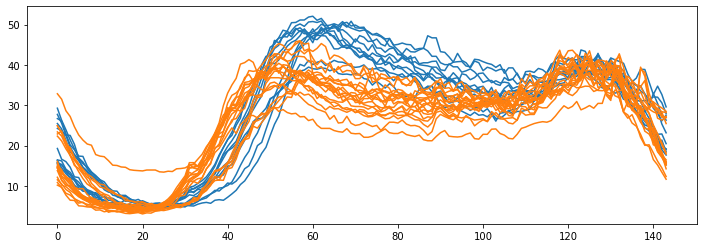

In [38]:
labels = kmeans.predict(X_test)

plt.figure(figsize=(12, 4))
# plt.plot(X.T, 'k')
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

### DBA-kmeans

In [18]:
%%time
tsKmeans=TimeSeriesKMeans(n_clusters=2, metric="dtw")
tsKmeans.fit(X_train)

CPU times: user 20.9 s, sys: 1.03 s, total: 22 s
Wall time: 5.9 s


TimeSeriesKMeans(metric='dtw', n_clusters=2)

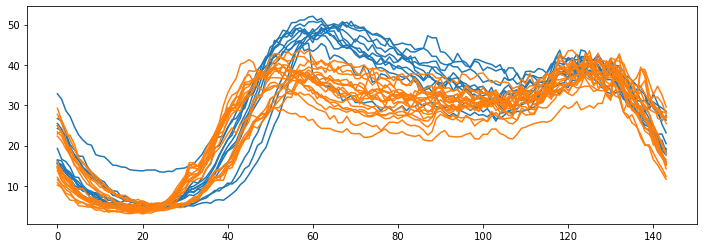

In [30]:
labelsTs = tsKmeans.predict(X_test)

plt.figure(figsize=(12, 4))
plt.plot(X_test[labelsTs == 0, :].T, '#1F77B4')
plt.plot(X_test[labelsTs == 1, :].T, '#FF7F0E')
plt.show()

In [39]:
np.sum(labels==labelsTs)/labels.size

0.8666666666666667

# B

628


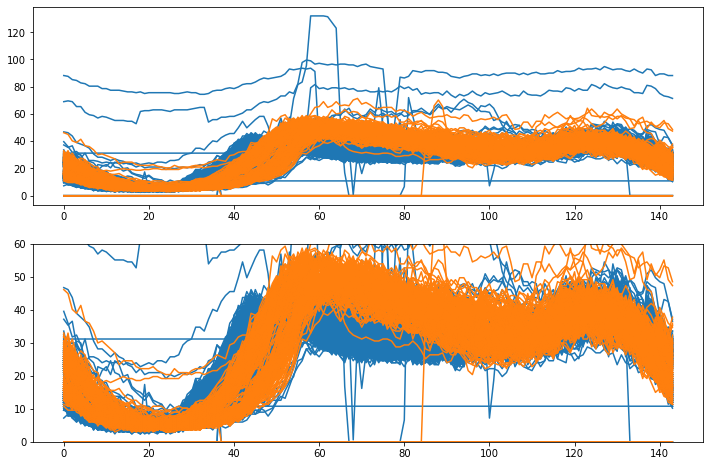

In [158]:
# Dataset 0
df = pd.read_csv('Dane/water_consumption_profiles.csv')
df['date'] = df['date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
df = df.set_index('date')
Xorig = df.values
Yorig= df.index.map(lambda x: 0 if x.dayofweek<5 else 1)
print(N)

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(Xorig[Yorig == 0, :].T, '#1F77B4')
plt.plot(Xorig[Yorig == 1, :].T, '#FF7F0E')
plt.subplot(2,1,2)
plt.plot(Xorig[Yorig == 0, :].T, '#1F77B4')
plt.plot(Xorig[Yorig == 1, :].T, '#FF7F0E')
plt.ylim(0,60)
plt.show()

In [154]:
odl=euclidean_distances(Xorig)
meanOdl=np.mean(odl,axis=1)

X=Xorig[meanOdl<200,:]
Y=Yorig[meanOdl<200]
N = len(X)

In [155]:
meanOdl[meanOdl>200]

array([356.93309927, 356.93309927, 269.23587197, 342.93642039,
       212.53769264, 353.55561505, 257.55511087, 202.79941867,
       353.62470192, 356.93309927, 356.93309927, 356.93309927,
       356.93309927, 356.93309927, 356.93309927, 356.93309927,
       356.93309927, 470.84946195, 505.17487604, 404.48622861,
       452.58178684, 214.69276478, 248.97613049])

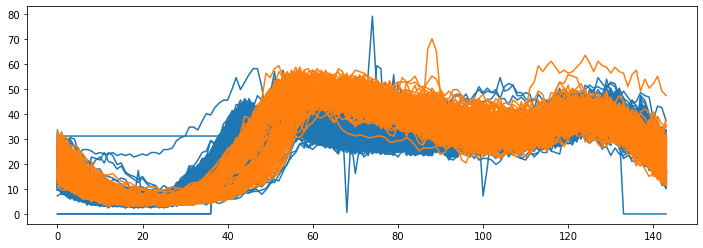

In [159]:
plt.figure(figsize=(12, 4))
plt.plot(X[Y == 0, :].T, '#1F77B4')
plt.plot(X[Y == 1, :].T, '#FF7F0E')
plt.show()

In [160]:
shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65*N):].copy()
train_indices = shuffled_indices_[:int(0.65*N)].copy()

X_train, Y_train = X[train_indices, :], Y[train_indices]
X_test,Y_test = X[test_indices, :], Y[test_indices]

print(X_train.shape)
print(X_test.shape)

(408, 144)
(220, 144)


### Kmeans

In [161]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_train)

plt.figure(figsize=(12, 4))
plt.plot(kmeans.cluster_centers_[0, :].T, '#1F77B4')
plt.plot(kmeans.cluster_centers_[1, :].T, '#FF7F0E')
plt.show()

KMeans(n_clusters=2)

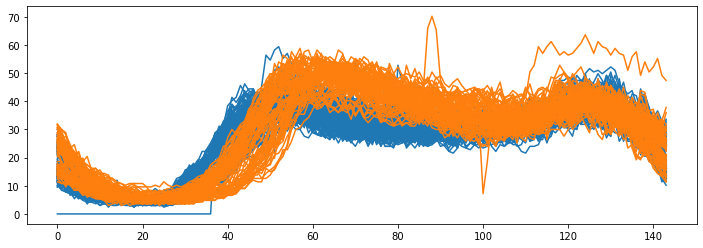

In [163]:
labels=kmeans.predict(X_test)

plt.figure(figsize=(12, 4))
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

In [164]:
np.sum(labels==Y_test)/labels.size

0.9045454545454545

### DBA-kmeans

In [165]:
%%time
tsKmeans=TimeSeriesKMeans(n_clusters=2, metric="dtw")
tsKmeans.fit(X_train)

CPU times: user 3min 6s, sys: 8.29 s, total: 3min 14s
Wall time: 1min 11s


TimeSeriesKMeans(metric='dtw', n_clusters=2)

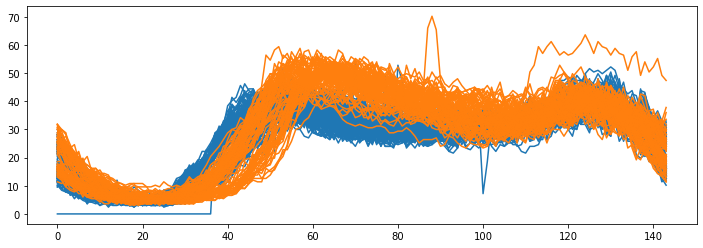

In [166]:
tsLabels=tsKmeans.predict(X_test)

plt.figure(figsize=(12, 4))
plt.plot(X_test[tsLabels == 0, :].T, '#1F77B4')
plt.plot(X_test[tsLabels == 1, :].T, '#FF7F0E')
plt.show()

In [168]:
np.sum(tsLabels==Y_test)/tsLabels.size

0.9363636363636364

# C

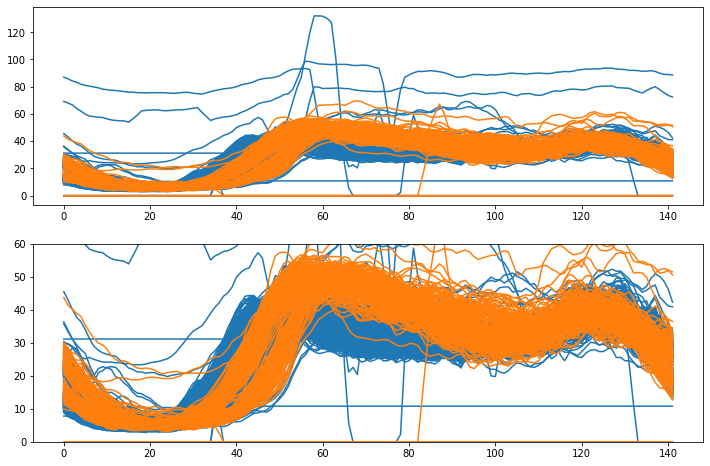

In [181]:
# Dataset 0
df = pd.read_csv('Dane/water_consumption_profiles.csv')
df['date'] = df['date'].map(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))
df = df.set_index('date')
df=df.rolling(3,axis=1).mean()
Xorig = df.values[:,2:]
Yorig= df.index.map(lambda x: 0 if x.dayofweek<5 else 1)

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.plot(Xorig[Yorig == 0, :].T, '#1F77B4')
plt.plot(Xorig[Yorig == 1, :].T, '#FF7F0E')
plt.subplot(2,1,2)
plt.plot(Xorig[Yorig == 0, :].T, '#1F77B4')
plt.plot(Xorig[Yorig == 1, :].T, '#FF7F0E')
plt.ylim(0,60)
plt.show()

In [182]:
odl=euclidean_distances(Xorig)
meanOdl=np.mean(odl,axis=1)

X=Xorig[meanOdl<200,:]
Y=Yorig[meanOdl<200]
N = len(X)

In [183]:
shuffled_indices_ = np.random.permutation(N)
test_indices = shuffled_indices_[int(0.65*N):].copy()
train_indices = shuffled_indices_[:int(0.65*N)].copy()

X_train, Y_train = X[train_indices, :], Y[train_indices]
X_test,Y_test = X[test_indices, :], Y[test_indices]

print(X_train.shape)
print(X_test.shape)

(408, 142)
(220, 142)


### Kmeans

0.09545454545454546


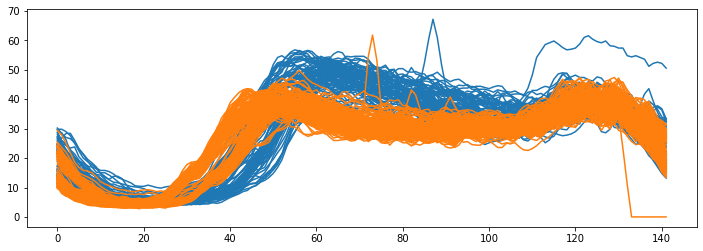

In [184]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_train)

labels=kmeans.predict(X_test)
print(np.sum(labels==Y_test)/labels.size)

plt.figure(figsize=(12, 4))
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.show()

### DBA-kmeans

In [185]:
tsKmeans=TimeSeriesKMeans(n_clusters=2, metric="dtw")
tsKmeans.fit(X_train)

tsLabels=tsKmeans.predict(X_test)
print(np.sum(tsLabels==Y_test)/tsLabels.size)
plt.figure(figsize=(12, 4))
plt.plot(X_test[tsLabels == 0, :].T, '#1F77B4')
plt.plot(X_test[tsLabels == 1, :].T, '#FF7F0E')
plt.show()

CPU times: user 3min 14s, sys: 8.89 s, total: 3min 23s
Wall time: 1min 9s


TimeSeriesKMeans(metric='dtw', n_clusters=2)

# D

In [189]:
arrow_train=np.loadtxt("Dane/ArrowHead_TRAIN.txt")
X_train=arrow_train[:,1:]
Y_train=np.array(arrow_train[:,0],dtype=int)

arrow_test=np.loadtxt("Dane/ArrowHead_TEST.txt")
X_test=arrow_test[:,1:]
Y_test=np.array(arrow_test[:,0],dtype=int)

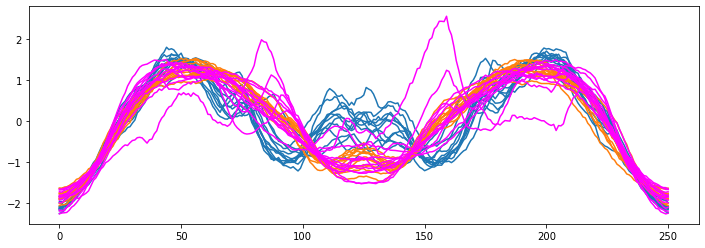

In [194]:
plt.figure(figsize=(12, 4))
plt.plot(X_train[Y_train == 0, :].T, '#1F77B4')
plt.plot(X_train[Y_train == 1, :].T, '#FF7F0E')
plt.plot(X_train[Y_train == 2, :].T, '#FF00FF')
plt.show()

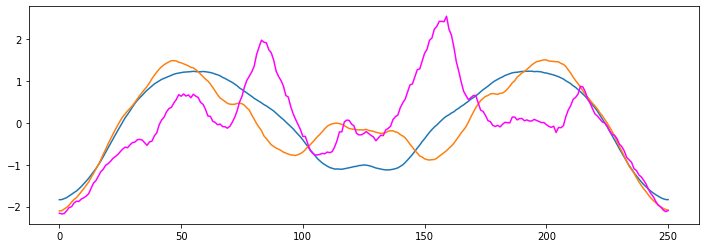

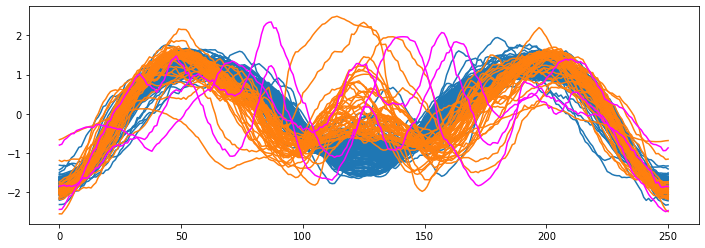

0.5485714285714286


In [240]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_train)

labels=kmeans.predict(X_test)

plt.figure(figsize=(12, 4))
plt.plot(kmeans.cluster_centers_[0, :].T, '#1F77B4')
plt.plot(kmeans.cluster_centers_[1, :].T, '#FF7F0E')
plt.plot(kmeans.cluster_centers_[2, :].T, '#FF00FF')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.plot(X_test[labels == 2, :].T, '#FF00FF')
plt.show()

dokladnosc=0
for perm in it.permutations([0,1,2]):
    suma=0
    for i,p in enumerate(perm):
        suma+=np.sum(labels[Y_test==i]==p)
    aktDok=suma/Y_test.size
    dokladnosc=max(dokladnosc,aktDok)
print(dokladnosc)

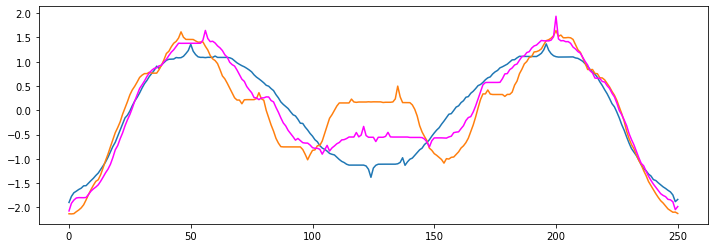

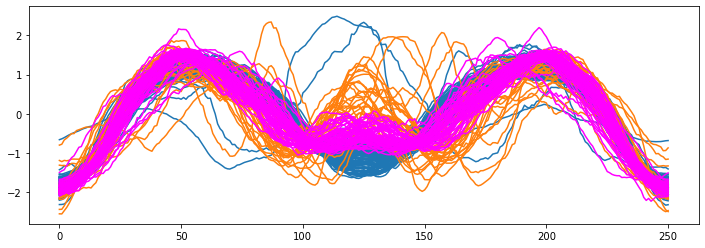

In [213]:
tsKmeans=TimeSeriesKMeans(n_clusters=3, metric="dtw")
tsKmeans.fit(X_train)

centra=tsKmeans.cluster_centers_[:,:,0]
plt.figure(figsize=(12, 4))
plt.plot(centra[0], '#1F77B4')
plt.plot(centra[1], '#FF7F0E')
plt.plot(centra[2], '#FF00FF')
plt.show()

tsLabels=tsKmeans.predict(X_test)
plt.figure(figsize=(12, 4))
plt.plot(X_test[tsLabels == 0, :].T, '#1F77B4')
plt.plot(X_test[tsLabels == 1, :].T, '#FF7F0E')
plt.plot(X_test[tsLabels == 2, :].T, '#FF00FF')
plt.show()

##### DBA-kmeans czasami tworzy osobną grupę dla odstających danych

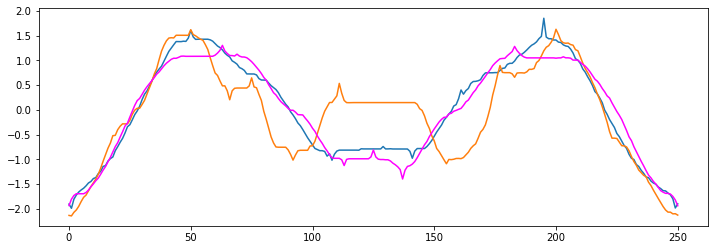

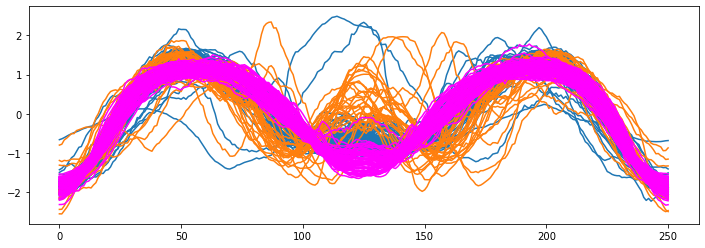

0.5428571428571428


In [241]:
tsKmeans=TimeSeriesKMeans(n_clusters=3, metric="dtw")
tsKmeans.fit(X_train)

centra=tsKmeans.cluster_centers_[:,:,0]
plt.figure(figsize=(12, 4))
plt.plot(centra[0], '#1F77B4')
plt.plot(centra[1], '#FF7F0E')
plt.plot(centra[2], '#FF00FF')
plt.show()

tsLabels=tsKmeans.predict(X_test)
plt.figure(figsize=(12, 4))
plt.plot(X_test[tsLabels == 0, :].T, '#1F77B4')
plt.plot(X_test[tsLabels == 1, :].T, '#FF7F0E')
plt.plot(X_test[tsLabels == 2, :].T, '#FF00FF')
plt.show()

dokladnosc=0
for perm in it.permutations([0,1,2]):
    suma=0
    for i,p in enumerate(perm):
        suma+=np.sum(tsLabels[Y_test==i]==p)
    aktDok=suma/Y_test.size
    dokladnosc=max(dokladnosc,aktDok)
print(dokladnosc)

# D2

In [264]:
with open("Dane/BasicMotions_TRAIN.ts","r") as plik:
    for i in range(13):
        plik.readline()
    klasy=[]
    dane=[]
    for linia in plik:
        podzial=linia.split(":")
        klasy.append(podzial[-1][:-1])
        dane.append([float(i) for i in podzial[0].split(",")])
X_train=np.array(dane)
Y_train=np.array(klasy)
with open("Dane/BasicMotions_TEST.ts","r") as plik:
    for i in range(13):
        plik.readline()
    klasy=[]
    dane=[]
    for linia in plik:
        podzial=linia.split(":")
        klasy.append(podzial[-1][:-1])
        dane.append([float(i) for i in podzial[0].split(",")])
X_test=np.array(dane)
Y_test=np.array(klasy)

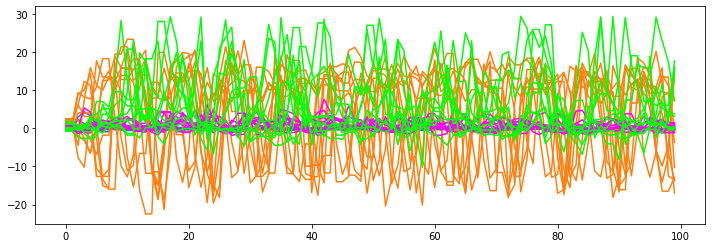

In [259]:
plt.figure(figsize=(12, 4))
plt.plot(X_train[Y_train == "Standing", :].T, '#1F77B4')
plt.plot(X_train[Y_train == "Running", :].T, '#FF7F0E')
plt.plot(X_train[Y_train == "Walking", :].T, '#FF00FF')
plt.plot(X_train[Y_train == "Badminton", :].T, '#00FF00')
plt.show()

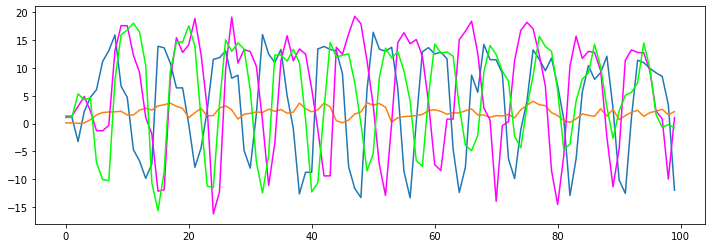

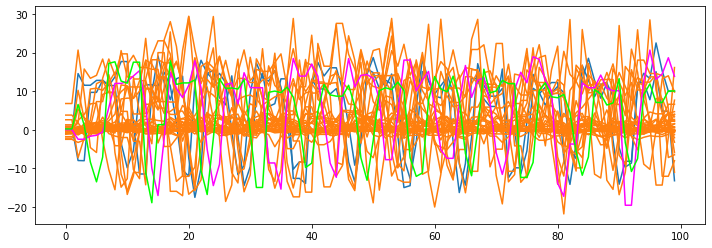

In [263]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X_train)

labels=kmeans.predict(X_test)

plt.figure(figsize=(12, 4))
plt.plot(kmeans.cluster_centers_[0, :].T, '#1F77B4')
plt.plot(kmeans.cluster_centers_[1, :].T, '#FF7F0E')
plt.plot(kmeans.cluster_centers_[2, :].T, '#FF00FF')
plt.plot(kmeans.cluster_centers_[3, :].T, '#00FF00')
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(X_test[labels == 0, :].T, '#1F77B4')
plt.plot(X_test[labels == 1, :].T, '#FF7F0E')
plt.plot(X_test[labels == 2, :].T, '#FF00FF')
plt.plot(X_test[labels == 3, :].T, '#00FF00')
plt.show()

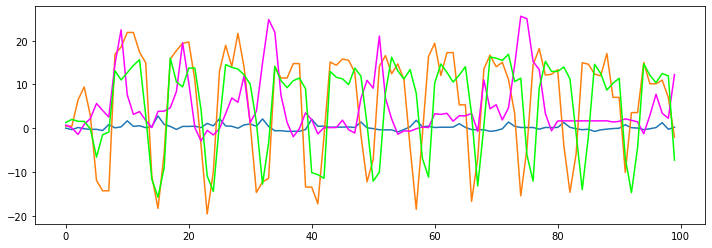

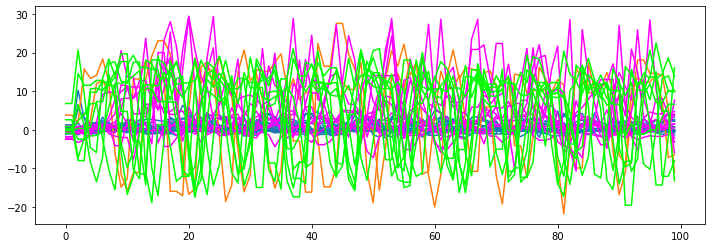

In [275]:
tsKmeans=TimeSeriesKMeans(n_clusters=4, metric="dtw")
tsKmeans.fit(X_train)

centra=tsKmeans.cluster_centers_[:,:,0]
plt.figure(figsize=(12, 4))
plt.plot(centra[0], '#1F77B4')
plt.plot(centra[1], '#FF7F0E')
plt.plot(centra[2], '#FF00FF')
plt.plot(centra[3], '#00FF00')
plt.show()

tsLabels=tsKmeans.predict(X_test)
plt.figure(figsize=(12, 4))
plt.plot(X_test[tsLabels == 0, :].T, '#1F77B4')
plt.plot(X_test[tsLabels == 1, :].T, '#FF7F0E')
plt.plot(X_test[tsLabels == 2, :].T, '#FF00FF')
plt.plot(X_test[tsLabels == 3, :].T, '#00FF00')
plt.show()

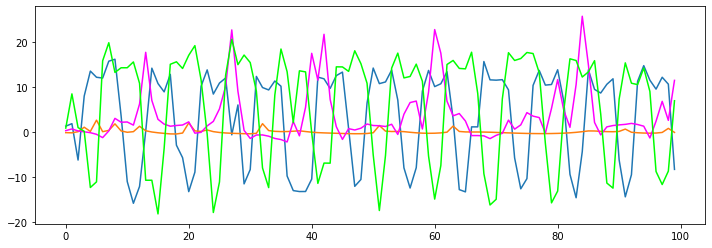

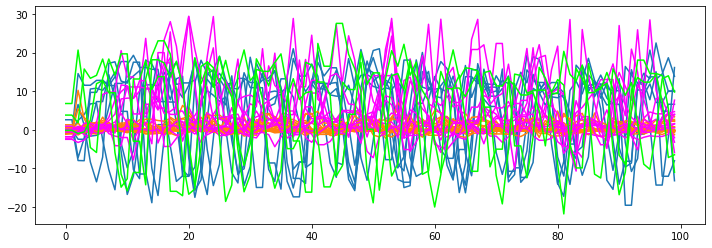

In [276]:
tsKmeans=TimeSeriesKMeans(n_clusters=4, metric="softdtw")
tsKmeans.fit(X_train)

centra=tsKmeans.cluster_centers_[:,:,0]
plt.figure(figsize=(12, 4))
plt.plot(centra[0], '#1F77B4')
plt.plot(centra[1], '#FF7F0E')
plt.plot(centra[2], '#FF00FF')
plt.plot(centra[3], '#00FF00')
plt.show()

tsLabels=tsKmeans.predict(X_test)
plt.figure(figsize=(12, 4))
plt.plot(X_test[tsLabels == 0, :].T, '#1F77B4')
plt.plot(X_test[tsLabels == 1, :].T, '#FF7F0E')
plt.plot(X_test[tsLabels == 2, :].T, '#FF00FF')
plt.plot(X_test[tsLabels == 3, :].T, '#00FF00')
plt.show()